<a href="https://colab.research.google.com/github/Connoroverbay/kmc/blob/main/kmc_assignment_Overbay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#kmc Assignment

###Question 1:

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [27]:
df['Price'].info()

df['Beds'].info()

df['Review Scores Rating'].info()

df['Number Of Reviews'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Price
Non-Null Count  Dtype
--------------  -----
30478 non-null  int64
dtypes: int64(1)
memory usage: 238.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Beds
Non-Null Count  Dtype  
--------------  -----  
30393 non-null  float64
dtypes: float64(1)
memory usage: 238.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Review Scores Rating
Non-Null Count  Dtype  
--------------  -----  
22155 non-null  float64
dtypes: float64(1)
memory usage: 238.2 KB
<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Number Of Reviews
Non-Null Count  Dtype
--------------  -----
30478 non-null  int64
dtypes: int64(1)
memory usage: 238.2 KB


In [31]:
df = df.loc[:,['Price','Beds','Review Scores Rating','Number Of Reviews']]
df.head()
df['Price'].value_counts()
df['Price'] = df['Price'].replace(',','')
df['Price'] = pd.to_numeric(df['Price'])
df['Price'].unique()


df['Beds'] = df['Beds'].fillna(1)
df.head()

df = df.dropna()

df.head()


,Price,Beds,Review Scores Rating,Number Of Reviews
4,549,3.0,96.0,39
5,149,1.0,100.0,4
6,250,1.0,100.0,9
7,90,1.0,94.0,80
8,270,2.0,90.0,95


In [35]:
df1 = df.drop('Price', axis = 1)

In [37]:
def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

df1 = df.drop('Price', axis = 1)
df1 = df1.apply(maxmin)

df1.head()

,Beds,Review Scores Rating,Number Of Reviews
4,0.1875,0.950,0.148438
5,0.0625,1.000,0.011719
6,0.0625,1.000,0.031250
7,0.0625,0.925,0.308594
8,0.1250,0.875,0.367188


In [43]:
from sklearn.cluster import KMeans

initial_centroids = np.random.randint(low=1,high=24,size=6)
model = KMeans(n_clusters=6, max_iter=1, init = df1.iloc[initial_centroids,:],  random_state=0)
model = model.fit(df1) # Initialize a kmc model
df1['price_hat'] = model.predict(df1)

df1.describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


,Beds,Review Scores Rating,Number Of Reviews,price_hat
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.899915,0.060568,2.305574
std,0.065205,0.110630,0.094954,1.703928
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.862500,0.003906,1.000000
50%,0.062500,0.925000,0.023438,2.000000
75%,0.125000,1.000000,0.074219,4.000000
max,1.000000,1.000000,1.000000,5.000000


In [46]:
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(df1) # Fit the emodel
df1['cluster'] = model.labels_

df1.describe()

,Beds,Review Scores Rating,Number Of Reviews,price_hat,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.899915,0.060568,2.305574,1.820176
std,0.065205,0.110630,0.094954,1.703928,1.511617
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.862500,0.003906,1.000000,1.000000
50%,0.062500,0.925000,0.023438,2.000000,1.000000
75%,0.125000,1.000000,0.074219,4.000000,3.000000
max,1.000000,1.000000,1.000000,5.000000,5.000000


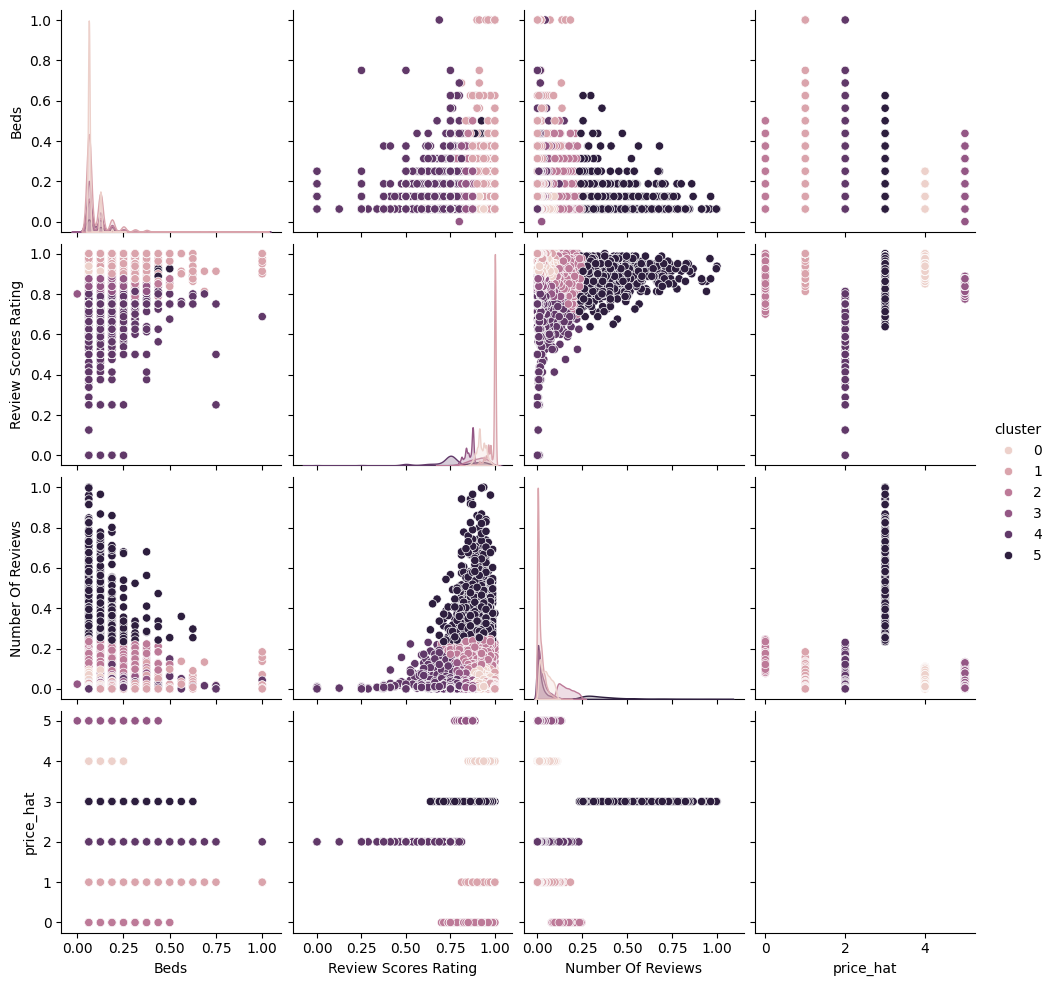

In [47]:
sns.pairplot(data=df1,hue='cluster')

In [49]:
df1['cluster'] = model.labels_
df1.loc[:,['price_hat','cluster'] ].groupby('cluster').describe()

price_hat                                   
            count mean  std  min  25%  50%  75%  max
cluster                                             
0          4514.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
1          7608.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
2          2705.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3          3191.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0
4          2950.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
5          1187.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0

<Axes: >

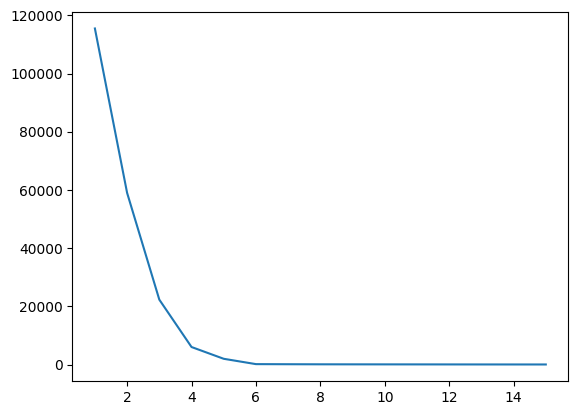

In [70]:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(df1)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE)

ValueError: Length of values (22155) does not match length of index (150)

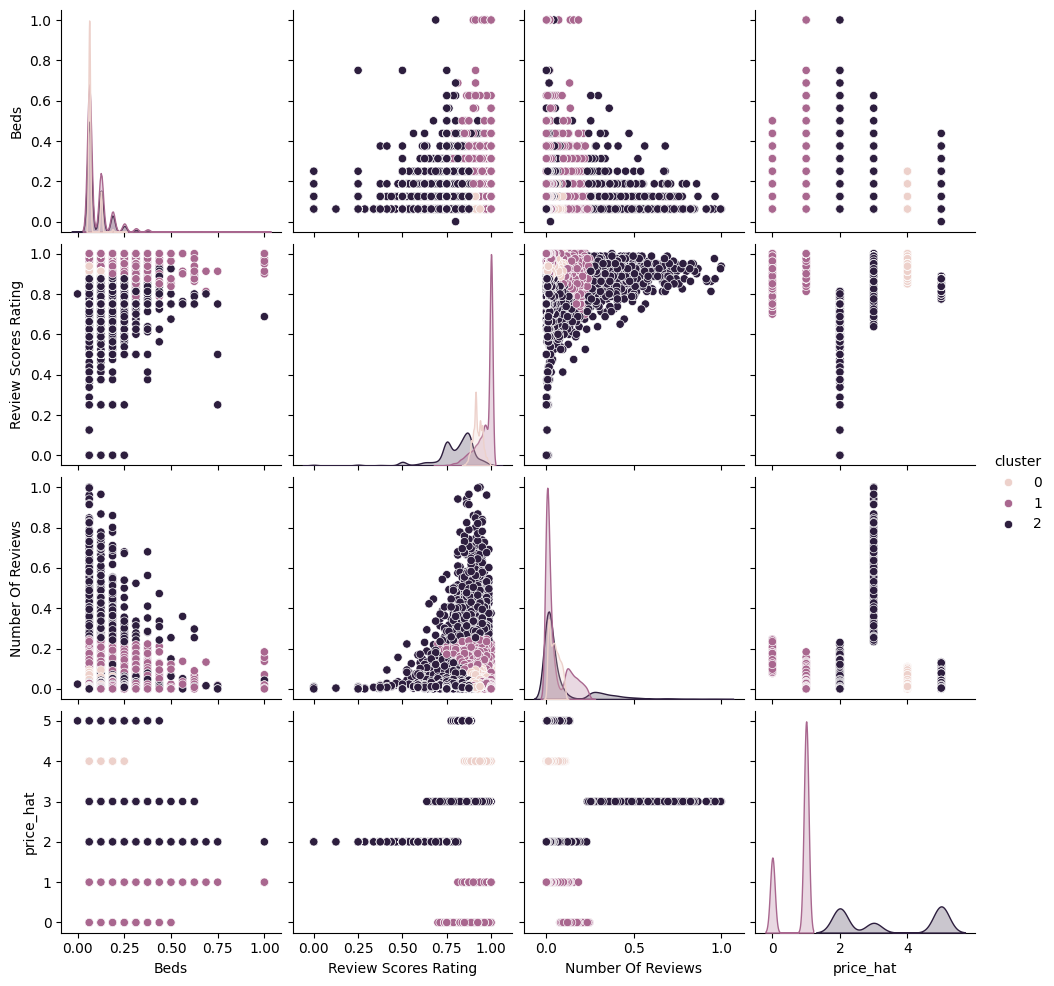

In [71]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(df1)
df1['cluster'] = model.labels_

sns.pairplot(data=df1,hue='cluster')

X['cluster'] = model.labels_
X.loc[:,['price','cluster'] ].groupby('cluster').describe()

** Im not exactly sure what this error means but the code still outputs graphs so I guess its OK?

###Question 2:


In [50]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

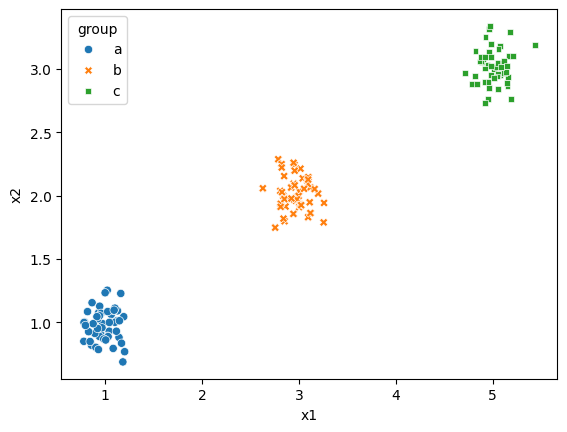

In [57]:
sns.scatterplot(data = df0_125, x='x1', y='x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

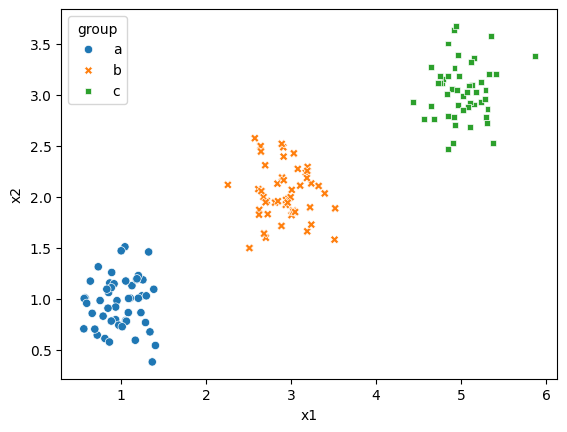

In [59]:
sns.scatterplot(data = df0_25, x='x1', y='x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

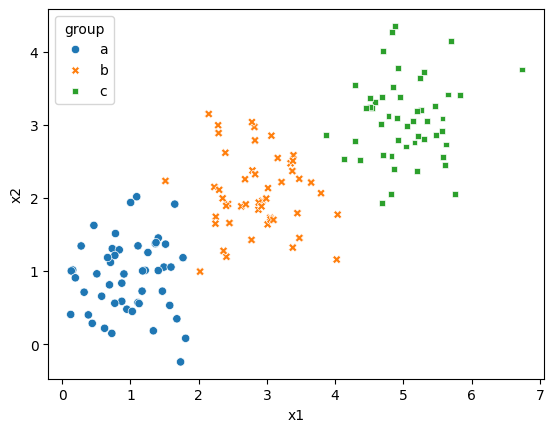

In [62]:
sns.scatterplot(data = df0_5, x='x1', y='x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

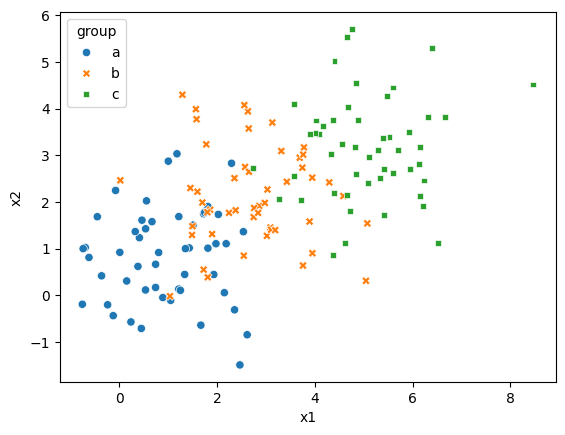

In [61]:
sns.scatterplot(data = df1_0, x='x1', y='x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

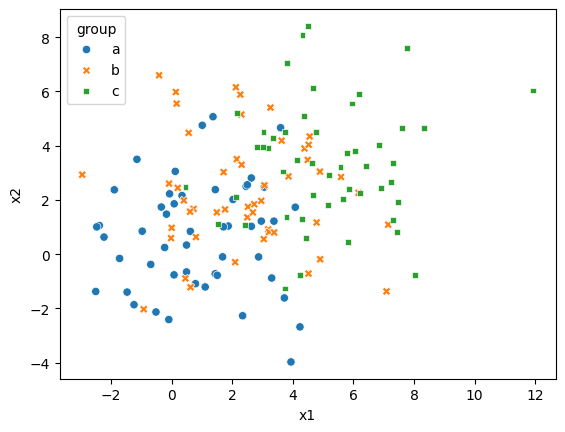

In [60]:
sns.scatterplot(data = df2_0, x='x1', y='x2', hue = 'group', style = 'group')

As the noise level increases, the compactness of the clusters decreases and it becomes harder to see the correlation between x1 and x2.

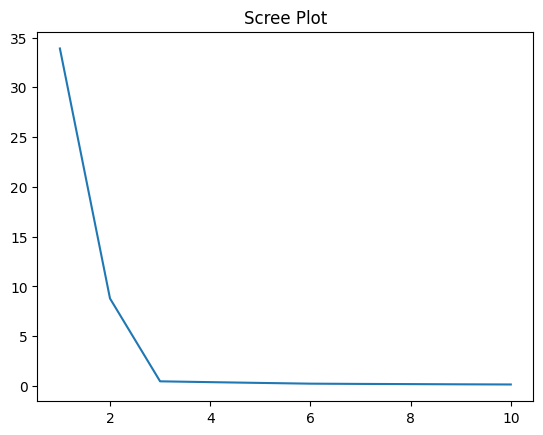

In [63]:
from sklearn.cluster import KMeans

def maxmin(x):
    x = (x-min(x))/(max(x)-min(x))
    return x

X = df0_125.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

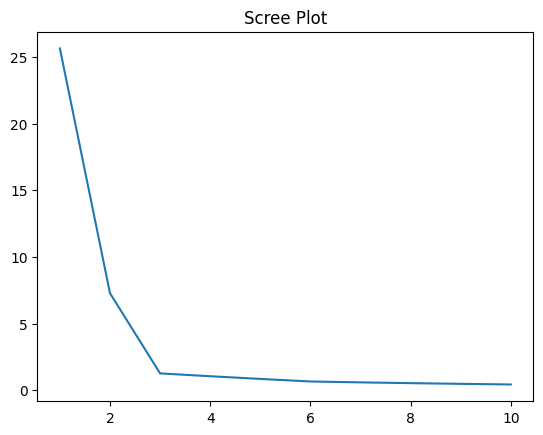

In [66]:
X = df0_25.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

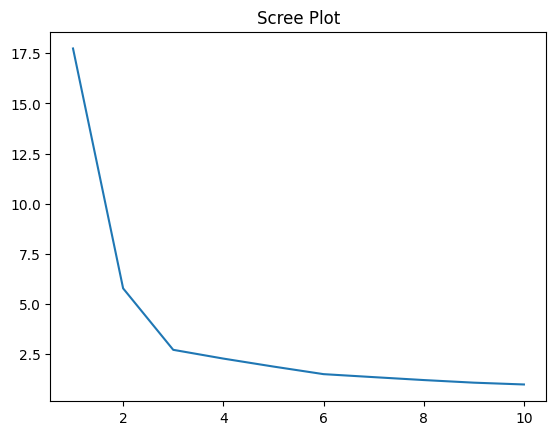

In [65]:
X = df0_5.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

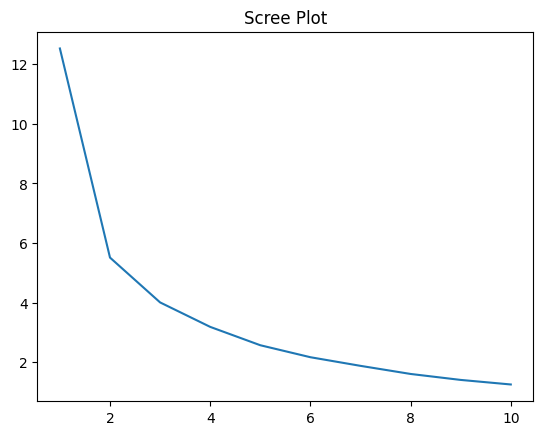

In [64]:
X = df1_0.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

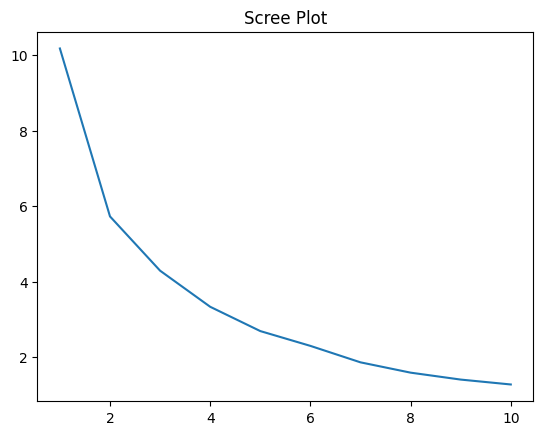

In [67]:
X = df2_0.loc[ : , ['x1','x2'] ]
X = X.apply(maxmin)

k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X)
    SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

For the first 3 plots, there seems to be a clear elbow at K=3 while the 4th plot seems to have an elbow at 2 and the 5th plot does not seem to have one. This makes it seem as though increasing the noise of the model makes it more difficult to identify an accurate K level and does not lend itself to scree plotting to identify optimal k values.

The slope of the scree plot is identifying the relationship between SSE and K values. The optimal point is when the K value is the lowest and the marginal benefit of adding an extra K level is highest. At the elbow in the graph, we see where the decreases in SSE due to increasing the K value go from significantly dropping, to only providing minimal returns in reducing SSE. Therefore the elbow in the graph would represent a rough estimate of the optimal K value. Increasing the noise in the graph as seen in this example makes it difficult to determine where the elbow in the graph is, making this method impractical at large noise levels.